In [1]:
import geopandas as gpd
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from measure import load_data

from gerrychain import Graph

%matplotlib inline

In [2]:
r = load_data("Oakland", "CA", "060")
r

Race data loaded.
City block group data loaded.


,total,hispanic,white,black,american_indian_al_native,asian,hawaiian_pac_islander,other,two_plus,partition,geometry
GISJOIN,,,,,,,,,,,
G06000104002001,1022,105,722,12,0,75,2,11,95,B14,"POLYGON ((-2258184.246 353217.527, -2258186.81..."
G06000104002002,979,102,661,27,0,115,0,3,71,C59,"POLYGON ((-2258439.130 352894.146, -2258619.65..."
G06000104003001,1123,84,802,28,2,113,0,3,91,C59,"POLYGON ((-2258662.984 352641.307, -2258755.16..."
G06000104003002,1528,176,908,86,3,191,5,14,145,C59,"POLYGON ((-2259955.644 352133.337, -2259945.80..."
G06000104003003,1390,168,606,386,2,86,9,6,127,C59,"POLYGON ((-2259955.644 352133.337, -2259965.40..."
...,...,...,...,...,...,...,...,...,...,...,...
G06000104326022,1293,421,241,326,3,220,15,10,57,C84,"POLYGON ((-2254108.399 337764.568, -2254107.30..."
G06000104326023,1189,349,238,237,6,276,16,6,61,C84,"POLYGON ((-2254081.286 337216.320, -2254120.86..."
G06000104327001,866,173,484,39,2,95,1,7,65,B48,"POLYGON ((-2253233.767 337726.966, -2253214.40..."


In [12]:
r.iloc[1].geometry.bounds

(-2259811.0787000004, 352594.9180999994, -2258383.8534999993, 353090.0022)

In [4]:
graph = Graph.from_geodataframe(r, adjacency="queen")

/home/arunavgupta/anaconda3/envs/segregation-measure/lib/python3.8/site-packages/gerrychain/graph/graph.py:227: UserWarning: Found islands (degree-0 nodes). Indices of islands: {'G06000104044004'}
  warnings.warn(


In [11]:
def get_node_by_id(geoid, graph=graph):
    for node in graph:
        return node.name

In [37]:
components = list(nx.connected_components(graph))
[len(c) for c in components]

[469]

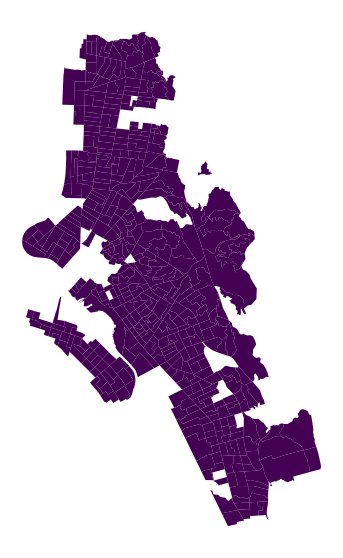

In [38]:
biggest_component_size = max(len(c) for c in components)
problem_components = [c for c in components if len(c) != biggest_component_size]
problem_nodes = [node for component in problem_components for node in component]

is_a_problem = r.index.isin(problem_nodes)
r.plot(column=is_a_problem, figsize=(10, 10))
plt.axis('off')
plt.show()

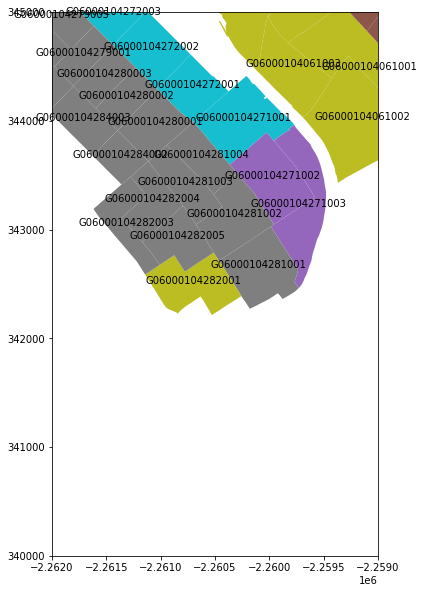

In [33]:
r['is_island'] = [g not in graph.islands for g in r.index.values]

x_min, x_max, y_min, y_max = -2.262e6, -2.259e6, 340000, 345000

fig = r.plot(column='partition', figsize=(10, 10))
for idx, row in r.iterrows():
    xy = (
            (row['geometry'].bounds[0] + row['geometry'].bounds[-2]) / 2, 
            (row['geometry'].bounds[1] + row['geometry'].bounds[-1]) / 2
         )
    if x_min <= xy[0] <= x_max and y_min <= xy[1] <= y_max:
        plt.annotate(s=row.name, xy=xy,
                 horizontalalignment='center')
plt.axis([x_min, x_max, y_min, y_max])
plt.show()

In [17]:
graph.nodes['G06000104044003']

{'boundary_node': True,
 'boundary_perim': 3604.55543740162,
 'area': 1364954.6918811526}

In [34]:
# connect problem nodes to rest of graph
# graph.add_edge('G06000104044003', 'G06000104044004')
graph.add_edge('G06000104271001', 'G06000104061003')

In [35]:
list(nx.connected_components(graph))

[{'G06000104002001',
  'G06000104002002',
  'G06000104003001',
  'G06000104003002',
  'G06000104003003',
  'G06000104003004',
  'G06000104004001',
  'G06000104004002',
  'G06000104004003',
  'G06000104005001',
  'G06000104005002',
  'G06000104005003',
  'G06000104006001',
  'G06000104006002',
  'G06000104007001',
  'G06000104007002',
  'G06000104007003',
  'G06000104007004',
  'G06000104008001',
  'G06000104008002',
  'G06000104008003',
  'G06000104009001',
  'G06000104009002',
  'G06000104010001',
  'G06000104010002',
  'G06000104010003',
  'G06000104010004',
  'G06000104010005',
  'G06000104010006',
  'G06000104011001',
  'G06000104011002',
  'G06000104011003',
  'G06000104011004',
  'G06000104012001',
  'G06000104012002',
  'G06000104012003',
  'G06000104013001',
  'G06000104013002',
  'G06000104014001',
  'G06000104014002',
  'G06000104015001',
  'G06000104015002',
  'G06000104015003',
  'G06000104016001',
  'G06000104016002',
  'G06000104017001',
  'G06000104017002',
  'G060001040

In [36]:
# verify graph is connected
nx.is_connected(graph)

True

In [40]:
# save graph as json
graph.to_json("./no_island_graphs_2020/oakland.json")